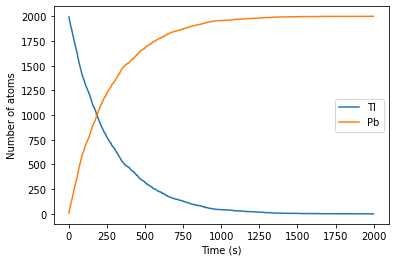

In [1]:
# To generate the exponential distribution from uniform distribution
import numpy as np
import matplotlib.pyplot as plt

tau = 3.053*60

N_atom = 2000   #2000 Tl atoms
N_time = 2000   #2000 seconds
mu = np.log(2)/tau
N_Pb = np.zeros([N_time-1])  #the array to store the number of decayed atoms in each time step 
N_Tl = N_atom * np.ones([N_time-1])  #the array to store the number of decayed atoms in each time step 

# 2000 cycles
for i in range(N_atom):    
    z0 = np.random.random()
    x0 = int(-np.log(1-z0)/mu) #the time to decay from random number
    if x0<N_time:     
        N_Pb[x0:] += 1  #after decay, we need to count 1 from now on
        N_Tl[x0:] -= 1  #after decay, we need to count 1 from now on
        
plt.plot(N_Tl, label='Tl')
plt.plot(N_Pb, label='Pb')
plt.xlabel("Time (s)")
plt.ylabel("Number of atoms")

plt.legend()
plt.show()

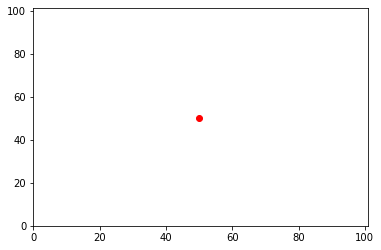

In [15]:
# Brownian Motion
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
# initialization

L1 = 101
L2 = 101
N = 1000

#will update the x and y position arrays
xdata = []
ydata = []
ln, = plt.plot([], [], "ro")
#initial direction 
direction = [[0, 1], [0, -1], [1, 0], [-1, 0]]

#initializes the correct parameters && sets graph limits
def init():
    ax.set_xlim(0, L1)
    ax.set_ylim(0, L2)
    xdata.append(int(L1/2))
    ydata.append(int(L2/2))
    ln.set_data(xdata, ydata)
    return ln,


#function to update the parameters
def update(frame):
    x = -1
    y = -1
    
    while min(x, y) < 0 or x > L1 or y > L2:
        move = np.random.randint(len(direction))
        x = xdata[frame-1] + direction[move][0]
        y = ydata[frame-1] + direction[move][1]
        
    xdata.append(x)
    ydata.append(y)
    ln.set_data(xdata, ydata)
    return ln,

#run the animation
ani = FuncAnimation(fig, update, frames=np.arange(1, N), init_func=init, blit=True)
plt.show()

